# Quantitative Investing with Python
## Final Project

Students: Manuel Cervera Escalante, Sadhana Smruthi Srinivasan, and Carlos E. Rosillo Fuentes

Explain the project here later

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

Load databases and pre process data

In [2]:
# Load both databases
data_compustat = pd.read_csv('finalproject_data/compustat_ratios.csv') # For financial ratios
cs_crsp = pd.read_pickle('data/crsp.pkl') # For stock prices


In [3]:
data_compustat.tail()

,gvkey,permno,adate,qdate,public_date,evm,cfm,roa,roce,aftret_invcapx,pretret_noa,GProf,debt_at,debt_ebitda,debt_capital,intcov_ratio,curr_ratio,accrual,divyield
2921530,349972,15642,12/31/2021,06/30/2022,08/31/2022,-2.991,NaN,-0.342,-0.386,-0.385,-0.387,0.0,0.003,-0.008,0.078,NaN,8.732,-0.000,NaN
2921531,349972,15642,12/31/2021,06/30/2022,09/30/2022,-2.991,NaN,-0.342,-0.386,-0.385,-0.387,0.0,0.003,-0.008,0.078,NaN,8.732,-0.000,NaN
2921532,349972,15642,12/31/2021,06/30/2022,10/31/2022,-2.991,NaN,-0.342,-0.386,-0.385,-0.387,0.0,0.003,-0.008,0.078,NaN,8.732,-0.000,NaN
2921533,349972,15642,12/31/2021,09/30/2022,11/30/2022,-2.138,NaN,-0.361,-0.406,-0.403,-0.409,0.0,0.004,-0.010,0.071,NaN,9.479,0.014,NaN
2921534,349972,15642,12/31/2021,09/30/2022,12/31/2022,-2.138,NaN,-0.361,-0.406,-0.403,-0.409,0.0,0.004,-0.010,0.071,NaN,9.479,0.014,NaN


In [4]:
data_compustat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2921535 entries, 0 to 2921534
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   gvkey           int64  
 1   permno          int64  
 2   adate           object 
 3   qdate           object 
 4   public_date     object 
 5   evm             float64
 6   cfm             float64
 7   roa             float64
 8   roce            float64
 9   aftret_invcapx  float64
 10  pretret_noa     float64
 11  GProf           float64
 12  debt_at         float64
 13  debt_ebitda     float64
 14  debt_capital    float64
 15  intcov_ratio    float64
 16  curr_ratio      float64
 17  accrual         float64
 18  divyield        object 
dtypes: float64(13), int64(2), object(4)
memory usage: 423.5+ MB


In [5]:
data_compustat['public_date'] = pd.to_datetime(data_compustat['public_date'], format='%m/%d/%Y', errors='coerce')

In [3]:
# rename stock identifier to be consistent with CRSP
data_compustat = data_compustat.rename(columns = {'permno': 'PERMNO'})
data_compustat['public_date'] = pd.to_datetime(data_compustat['public_date'], format='%m/%d/%Y', errors='coerce')
df = data_compustat.set_index(['PERMNO', 'public_date'])
df.tail(3)

# keep only the necessary data
cs_vars = ['roce','roa','cfm','GProf','curr_ratio']
compustat = df[cs_vars].copy().dropna(how='all')
compustat.head(10)

roce    roa    cfm  GProf  curr_ratio
PERMNO public_date                                        
25881  1971-01-31   0.341  0.287  0.077  0.425       1.238
       1971-02-28   0.189  0.173  0.071  0.443       1.090
       1971-03-31   0.189  0.173  0.071  0.443       1.090
       1971-04-30   0.189  0.173  0.071  0.443       1.090
       1971-05-31   0.189  0.173  0.071  0.443       1.090
       1971-06-30   0.189  0.173  0.071  0.443       1.090
       1971-07-31   0.189  0.173  0.071  0.443       1.090
       1971-08-31   0.189  0.173  0.071  0.443       1.090
       1971-09-30   0.189  0.173  0.071  0.443       1.090
       1971-10-31   0.189  0.173  0.071  0.443       1.090

Merge databases

In [8]:
compustat.head()

,public_date,roce,roa,cfm,GProf,curr_ratio,date
PERMNO,,,,,,,
25881,1971-01-31,0.341,0.287,0.077,0.425,1.238,1971-01
25881,1971-02-28,0.189,0.173,0.071,0.443,1.090,1971-02
25881,1971-03-31,0.189,0.173,0.071,0.443,1.090,1971-03
25881,1971-04-30,0.189,0.173,0.071,0.443,1.090,1971-04
25881,1971-05-31,0.189,0.173,0.071,0.443,1.090,1971-05


In [5]:
compustat = compustat.reset_index(level='public_date')
compustat['date'] = compustat['public_date']

In [7]:
compustat['date'] = compustat['date'].dt.to_period('M')

In [9]:
compustat = compustat.set_index('date', append=True)
compustat['compustat_monthindex'] = (compustat['public_date'].dt.year - 1900) * 12 + compustat['public_date'].dt.month
compustat = compustat.drop(columns='public_date')
compustat.tail()

roce    roa  cfm  GProf  curr_ratio  compustat_monthindex
PERMNO date                                                               
15642  2022-08 -0.386 -0.342  NaN    0.0       8.732                  1472
       2022-09 -0.386 -0.342  NaN    0.0       8.732                  1473
       2022-10 -0.386 -0.342  NaN    0.0       8.732                  1474
       2022-11 -0.406 -0.361  NaN    0.0       9.479                  1475
       2022-12 -0.406 -0.361  NaN    0.0       9.479                  1476

In [12]:
cs_crsp

,date,EXCHCD,ret,me
PERMNO,,,,
10000,1986-01,3.0,NaN,16.100000
10000,1986-02,3.0,-0.257143,11.960000
10000,1986-03,3.0,0.365385,16.330000
10000,1986-04,3.0,-0.098592,15.172000
10000,1986-05,3.0,-0.222656,11.793878
...,...,...,...,...
93436,2023-05,3.0,0.241130,646356.919025
93436,2023-06,3.0,0.283627,830857.948260
93436,2023-07,3.0,0.021622,848821.183680


In [11]:
cs_crsp = cs_crsp.reset_index(level='date')
cs_crsp['date'] = cs_crsp['date'].dt.to_period('M')

In [13]:
cs_crsp = cs_crsp.set_index('date', append=True)
cs_crsp = cs_crsp.merge(compustat, left_index=True, right_index=True, how='outer')
cs_crsp['crsp_monthindex'] = (cs_crsp.index.get_level_values('date').year - 1900) * 12 + cs_crsp.index.get_level_values('date').month
cs_crsp.tail(25)

EXCHCD       ret            me   roce    roa    cfm  GProf  \
PERMNO date                                                                  
93436  2021-09     3.0  0.054042  7.785819e+05  0.099  0.120  0.117  0.228   
       2021-10     3.0  0.436530  1.118751e+06  0.099  0.120  0.117  0.228   
       2021-11     3.0  0.027612  1.149642e+06  0.129  0.139  0.135  0.248   
       2021-12     3.0 -0.076855  1.092191e+06  0.129  0.139  0.135  0.248   
       2022-01     3.0 -0.113609  9.681076e+05  0.129  0.139  0.135  0.248   
       2022-02     3.0 -0.070768  8.995964e+05  0.174  0.165  0.159  0.266   
       2022-03     3.0  0.238009  1.116368e+06  0.174  0.165  0.159  0.266   
       2022-04     3.0 -0.191945  9.021161e+05  0.174  0.165  0.159  0.266   
       2022-05     3.0 -0.129197  7.855650e+05  0.260  0.224  0.187  0.332   
       2022-06     3.0 -0.111888  7.010302e+05  0.260  0.224  0.187  0.332   
       2022-07     3.0  0.323765  9.311106e+05  0.260  0.224  0.187  0.332   
       2022-08     3.0 -0.072489  8.636156e+05  0.284  0.237  0.193  0.340   
       2022-09     3.0 -0.037589  8.376595e+05  0.284  0.237  0.193  0.340   
       2022-10     3.0 -0.142168  7.185149e+05  0.284  0.237  0.193  0.340   
       2022-11     3.0 -0.144326  6.148143e+05  0.312  0.253  0.198  0.347   
       2022-12     3.0 -0.367334  3.897415e+05  0.312  0.253  0.198  0.347   
       2023-01     3.0  0.406235  5.480859e+05    NaN    NaN    NaN    NaN   
       2023-02     3.0  0.187565  6.508877e+05    NaN    NaN    NaN    NaN   
       2023-03     3.0  0.008507  6.575059e+05    NaN    NaN    NaN    NaN   
       2023-04     3.0 -0.207992  5.207812e+05    NaN    NaN    NaN    NaN   
       2023-05     3.0  0.241130  6.463569e+05    NaN    NaN    NaN    NaN   
       2023-06     3.0  0.283627  8.308579e+05    NaN    NaN    NaN    NaN   
       2023-07     3.0  0.021622  8.488212e+05    NaN    NaN    NaN    NaN   
       2023-08     3.0 -0.034962  8.191443e+05    NaN    NaN    NaN    NaN   
       2023-09     3.0 -0.030456  7.941968e+05    NaN    NaN    NaN    NaN   

                curr_ratio  compustat_monthindex  crsp_monthindex  
PERMNO date                                                        
93436  2021-09       1.664                1461.0             1461  
       2021-10       1.664                1462.0             1462  
       2021-11       1.591                1463.0             1463  
       2021-12       1.591                1464.0             1464  
       2022-01       1.591                1465.0             1465  
       2022-02       1.375                1466.0             1466  
       2022-03       1.375                1467.0             1467  
       2022-04       1.375                1468.0             1468  
       2022-05       1.400                1469.0             1469  
       2022-06       1.400                1470.0             1470  
       2022-07       1.400                1471.0             1471  
       2022-08       1.387                1472.0             1472  
       2022-09       1.387                1473.0             1473  
       2022-10       1.387                1474.0             1474  
       2022-11       1.408                1475.0             1475  
       2022-12       1.408                1476.0             1476  
       2023-01         NaN                   NaN             1477  
       2023-02         NaN                   NaN             1478  
       2023-03         NaN                   NaN             1479  
       2023-04         NaN                   NaN             1480  
       2023-05         NaN                   NaN             1481  
       2023-06         NaN                   NaN             1482  
       2023-07         NaN                   NaN             1483  
       2023-08         NaN                   NaN             1484  
       2023-09         NaN                   NaN             1485

In [14]:
cs_crsp.to_pickle('data/cs_crsp_wratios.pkl')

In [16]:
# Drop Nan values
cs_crsp = cs_crsp.dropna()
cs_crsp.tail(25)

EXCHCD       ret            me   roce    roa    cfm  GProf  \
PERMNO date                                                                  
93436  2020-12     3.0  0.243252  6.773402e+05  0.085  0.118  0.111  0.217   
       2021-01     3.0  0.124506  7.616730e+05  0.085  0.118  0.111  0.217   
       2021-02     3.0 -0.148740  6.483814e+05  0.077  0.104  0.107  0.176   
       2021-03     3.0 -0.011207  6.432166e+05  0.077  0.104  0.107  0.176   
       2021-04     3.0  0.062147  6.834248e+05  0.077  0.104  0.107  0.176   
       2021-05     3.0 -0.118713  6.022932e+05  0.081  0.110  0.105  0.216   
       2021-06     3.0  0.087137  6.688268e+05  0.081  0.110  0.105  0.216   
       2021-07     3.0  0.011034  6.803383e+05  0.081  0.110  0.105  0.216   
       2021-08     3.0  0.070605  7.370200e+05  0.099  0.120  0.117  0.228   
       2021-09     3.0  0.054042  7.785819e+05  0.099  0.120  0.117  0.228   
       2021-10     3.0  0.436530  1.118751e+06  0.099  0.120  0.117  0.228   
       2021-11     3.0  0.027612  1.149642e+06  0.129  0.139  0.135  0.248   
       2021-12     3.0 -0.076855  1.092191e+06  0.129  0.139  0.135  0.248   
       2022-01     3.0 -0.113609  9.681076e+05  0.129  0.139  0.135  0.248   
       2022-02     3.0 -0.070768  8.995964e+05  0.174  0.165  0.159  0.266   
       2022-03     3.0  0.238009  1.116368e+06  0.174  0.165  0.159  0.266   
       2022-04     3.0 -0.191945  9.021161e+05  0.174  0.165  0.159  0.266   
       2022-05     3.0 -0.129197  7.855650e+05  0.260  0.224  0.187  0.332   
       2022-06     3.0 -0.111888  7.010302e+05  0.260  0.224  0.187  0.332   
       2022-07     3.0  0.323765  9.311106e+05  0.260  0.224  0.187  0.332   
       2022-08     3.0 -0.072489  8.636156e+05  0.284  0.237  0.193  0.340   
       2022-09     3.0 -0.037589  8.376595e+05  0.284  0.237  0.193  0.340   
       2022-10     3.0 -0.142168  7.185149e+05  0.284  0.237  0.193  0.340   
       2022-11     3.0 -0.144326  6.148143e+05  0.312  0.253  0.198  0.347   
       2022-12     3.0 -0.367334  3.897415e+05  0.312  0.253  0.198  0.347   

                curr_ratio  compustat_monthindex  crsp_monthindex  
PERMNO date                                                        
93436  2020-12       1.329                1452.0             1452  
       2021-01       1.329                1453.0             1453  
       2021-02       1.875                1454.0             1454  
       2021-03       1.875                1455.0             1455  
       2021-04       1.875                1456.0             1456  
       2021-05       1.618                1457.0             1457  
       2021-06       1.618                1458.0             1458  
       2021-07       1.618                1459.0             1459  
       2021-08       1.664                1460.0             1460  
       2021-09       1.664                1461.0             1461  
       2021-10       1.664                1462.0             1462  
       2021-11       1.591                1463.0             1463  
       2021-12       1.591                1464.0             1464  
       2022-01       1.591                1465.0             1465  
       2022-02       1.375                1466.0             1466  
       2022-03       1.375                1467.0             1467  
       2022-04       1.375                1468.0             1468  
       2022-05       1.400                1469.0             1469  
       2022-06       1.400                1470.0             1470  
       2022-07       1.400                1471.0             1471  
       2022-08       1.387                1472.0             1472  
       2022-09       1.387                1473.0             1473  
       2022-10       1.387                1474.0             1474  
       2022-11       1.408                1475.0             1475  
       2022-12       1.408                1476.0             1476

In [17]:
def portfolio_sort(df=None, col=None, nyse=True, percentiles=None, id_col=None, annual=True):
    
    if nyse:
        sortvar = df.loc[df['EXCHCD']==1, col]
    else:
        sortvar = df[col]
    
    df[id_col] = np.nan
    group_id = 1
    grp = sortvar.dropna().groupby(level='date')
    
    for pct in percentiles:
        breakpoint = grp.apply(lambda x: np.percentile(x, pct))
        breakpoint.name = 'breakpoint'
        df_merged = df.merge(breakpoint, left_on='date', right_index=True, how='left')
        assigned = df_merged[id_col].isnull() & (df_merged[col] <= df_merged['breakpoint'])         
        df.loc[assigned[assigned].index, id_col] = group_id
        group_id += 1
    
    # assign firms to to the right from the last breakpoint into a group 
    assigned = df_merged[id_col].isnull() & (df_merged[col] > df_merged['breakpoint']) 
    df.loc[assigned[assigned].index, id_col] = group_id
    
    if annual:
        nonJune = df.index.get_level_values(level='date').month != 6
        df.loc[nonJune, id_col] = np.nan
        df[id_col] = df.groupby(level='PERMNO')[id_col].ffill(limit=11)
    
    return df

In [18]:
def compute_portfolio_returns(df=None, sort_groups=None):
    
    display(df.shape)

    df['retnm'] = df['ret'].groupby(level='PERMNO').shift(-1)
    df['me_x_retnm'] = df['me'] * df['retnm']

    # require me, sort variables, and return next month
    ok = df['me'].notnull()
    for required_var in ['retnm'] + sort_variables:
        ok = ok & df[required_var].notnull()
    df = df[ok]

    display(df.shape)

    sums = df.reset_index().groupby(by=['date'] + sort_groups)[['me', 'me_x_retnm']].sum()
    portfolio_returns = sums['me_x_retnm'] / sums['me']
    portfolio_returns = portfolio_returns.unstack(level=sort_groups)
    
    # because we used return as of NEXT MONTH, undo the timing so that the date in the index corresponds to the return realization
    portfolio_returns = portfolio_returns.shift(1)
    
    return portfolio_returns

In [19]:
def analyze_returns(r=None, name=None, start_date='1962-05', end_date='2023-09'):
    r = r.loc[start_date:end_date]
    ir = np.sqrt(12) * r.mean() / r.std()
    print(f'Analysis of a strategy: "{name}"')
    print(f'Start: {start_date}, End: {end_date}')
    print(f'Sharpe ratio: {ir:.2f}')
    r.cumsum().plot(figsize=(12,8),grid='visible')

In [20]:
# construct ROA factor

sort_variables = ['me', 'roa']
percentiles = {'me': [50],
              'roa': [30, 70]}

for sortvar in sort_variables:
    cs_crsp = portfolio_sort(df=cs_crsp, col=sortvar, nyse=True, percentiles=percentiles[sortvar], id_col=sortvar + '_group', annual=True)
    
sort_groups = [sortvar + '_group' for sortvar in sort_variables]

portfolio_returns = compute_portfolio_returns(cs_crsp, sort_groups=sort_groups)

(2324329, 12)

(2305653, 14)

Analysis of a strategy: "ROA factor"
Start: 1962-05, End: 2022-12
Sharpe ratio: 0.32


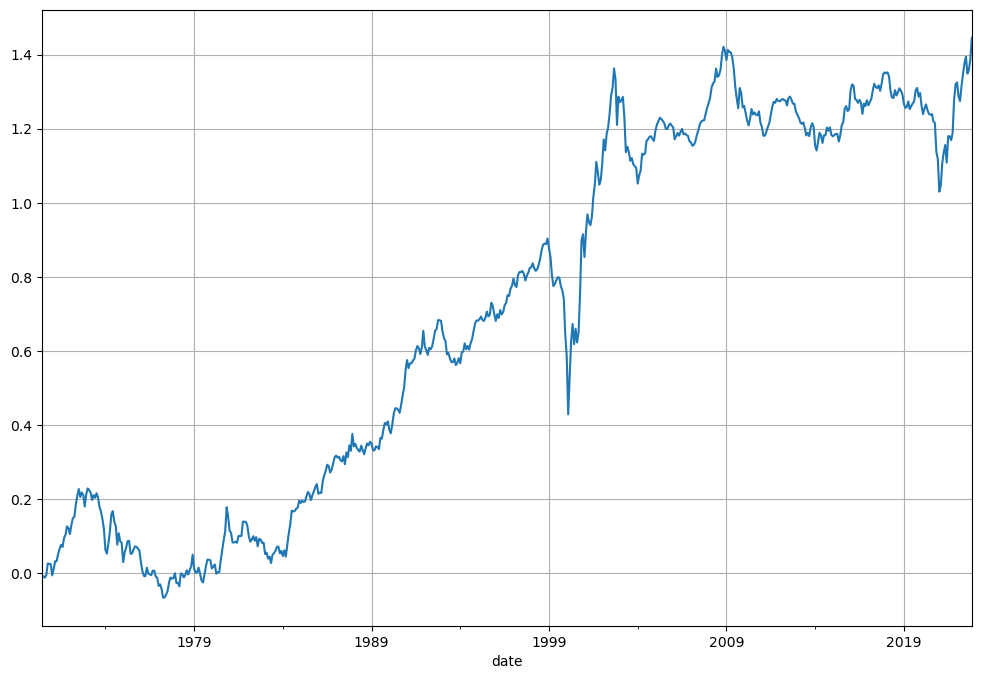

In [21]:
roa_factor = portfolio_returns.loc[:,[(1,3), (2,3)]].mean(axis=1) - portfolio_returns.loc[:,[(1,1), (2,1)]].mean(axis=1)
roa_factor.name = 'roa'
analyze_returns(roa_factor, 'ROA factor', end_date='2022-12')

In [23]:
# construct ROCE factor

sort_variables_roce = ['me', 'roce']
percentiles_roce = {'me': [50],
              'roce': [30, 70]}

for sortvar in sort_variables_roce:
    cs_crsp = portfolio_sort(df=cs_crsp, col=sortvar, nyse=True, percentiles=percentiles_roce[sortvar], id_col=sortvar + '_group', annual=True)
    
sort_groups = [sortvar + '_group' for sortvar in sort_variables_roce]

portfolio_returns_roce = compute_portfolio_returns(cs_crsp, sort_groups=sort_groups)

(2324329, 15)

(2305653, 15)

Analysis of a strategy: "ROCE factor"
Start: 1962-05, End: 2022-12
Sharpe ratio: 0.24


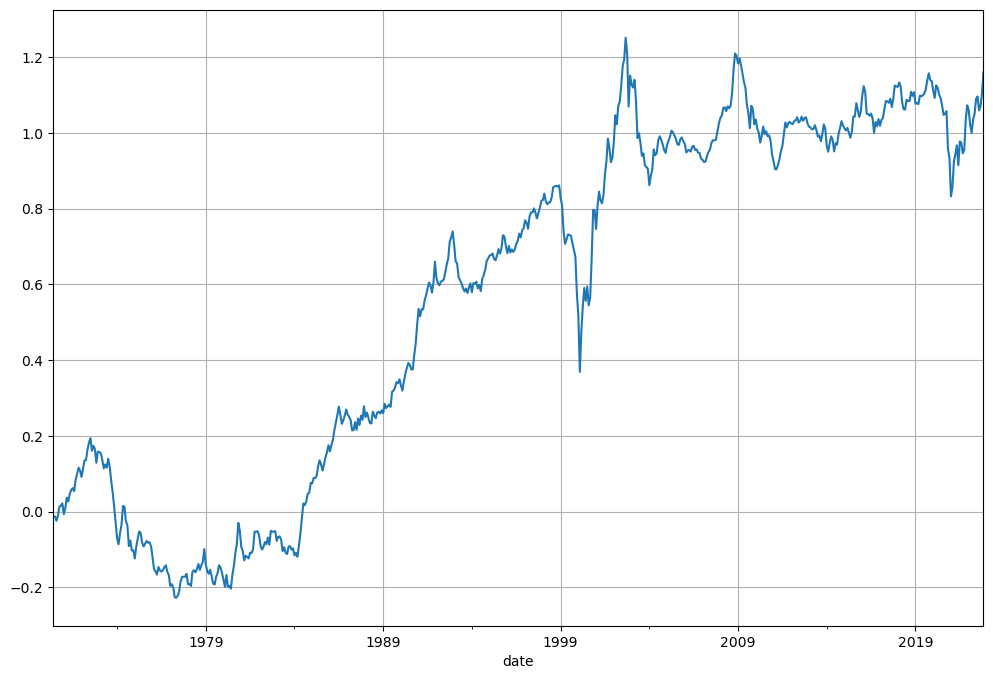

In [24]:
roce_factor = portfolio_returns_roce.loc[:,[(1,3), (2,3)]].mean(axis=1) - portfolio_returns_roce.loc[:,[(1,1), (2,1)]].mean(axis=1)
roce_factor.name = 'roce'
analyze_returns(roce_factor, 'ROCE factor', end_date='2022-12')

In [25]:
# construct cash flow margin factor

sort_variables_cfm = ['me', 'cfm']
percentiles_cfm = {'me': [50],
              'cfm': [30, 70]}

for sortvar in sort_variables_cfm:
    cs_crsp = portfolio_sort(df=cs_crsp, col=sortvar, nyse=True, percentiles=percentiles_cfm[sortvar], id_col=sortvar + '_group', annual=True)
    
sort_groups = [sortvar + '_group' for sortvar in sort_variables_cfm]

portfolio_returns_cfm = compute_portfolio_returns(cs_crsp, sort_groups=sort_groups)

(2324329, 16)

(2305653, 16)

Analysis of a strategy: "CFM factor"
Start: 1962-05, End: 2022-12
Sharpe ratio: 0.24


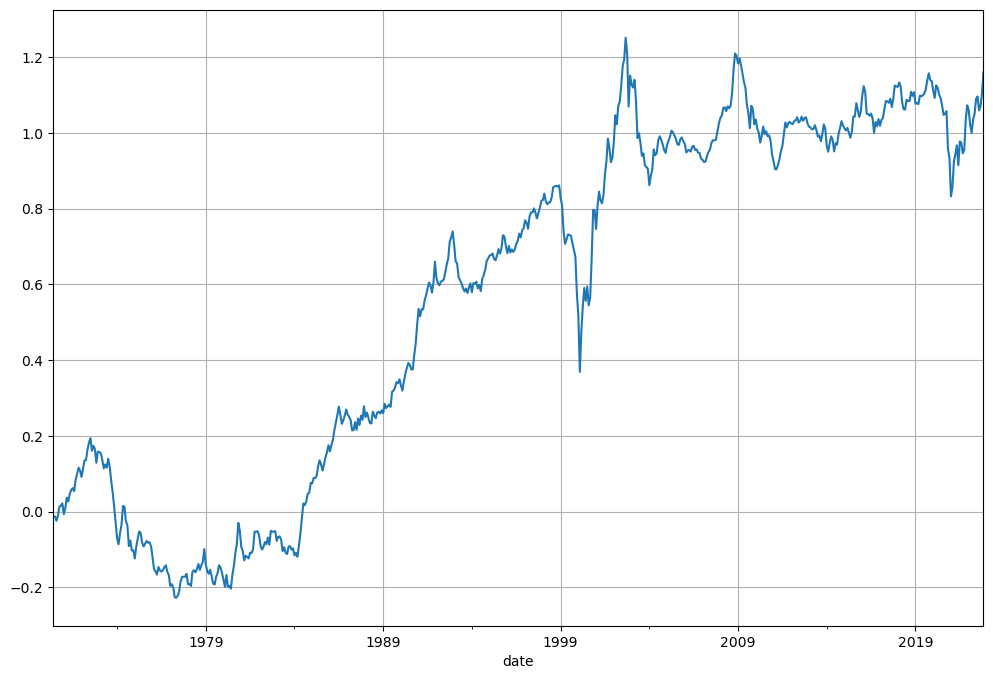

In [26]:
cfm_factor = portfolio_returns_cfm.loc[:,[(1,3), (2,3)]].mean(axis=1) - portfolio_returns_cfm.loc[:,[(1,1), (2,1)]].mean(axis=1)
cfm_factor.name = 'cfm'
analyze_returns(roce_factor, 'CFM factor', end_date='2022-12')

In [29]:
# construct gross profit factor

sort_variables_gp = ['me', 'GProf']
percentiles_gp = {'me': [50],
              'GProf': [30, 70]}

for sortvar in sort_variables_gp:
    cs_crsp = portfolio_sort(df=cs_crsp, col=sortvar, nyse=True, percentiles=percentiles_gp[sortvar], id_col=sortvar + '_group', annual=True)
    
sort_groups = [sortvar + '_group' for sortvar in sort_variables_gp]

portfolio_returns_gp = compute_portfolio_returns(cs_crsp, sort_groups=sort_groups)

(2324329, 17)

(2305653, 17)

Analysis of a strategy: "Gross Profit factor"
Start: 1962-05, End: 2022-12
Sharpe ratio: 0.42


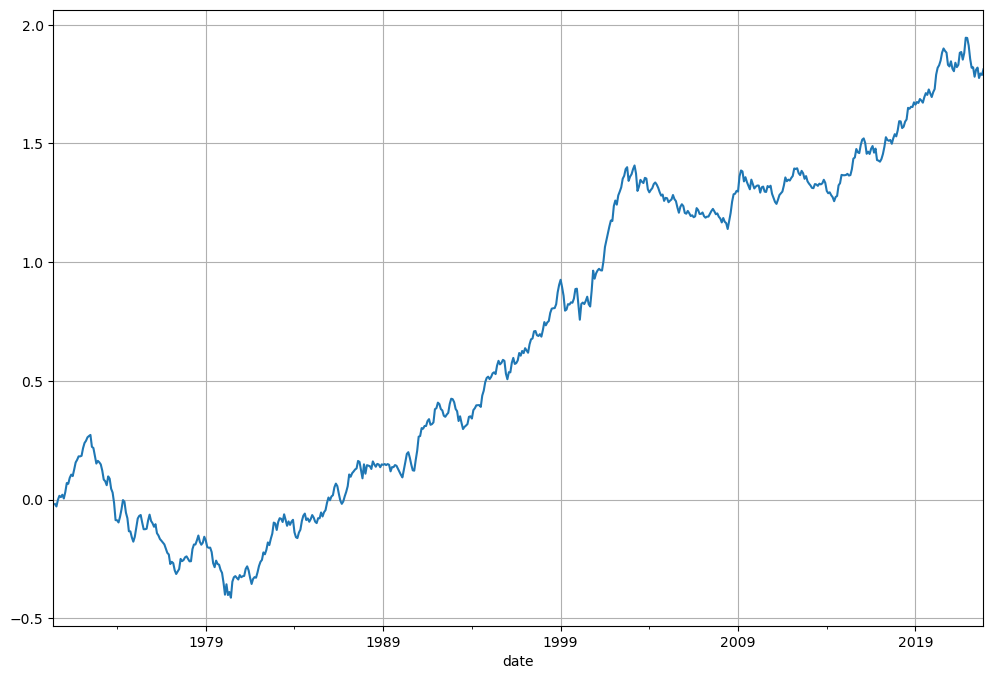

In [30]:
gp_factor = portfolio_returns_gp.loc[:,[(1,3), (2,3)]].mean(axis=1) - portfolio_returns_gp.loc[:,[(1,1), (2,1)]].mean(axis=1)
gp_factor.name = 'gp'
analyze_returns(gp_factor, 'Gross Profit factor', end_date='2022-12')

In [32]:
# construct current ratio factor

sort_variables_cr = ['me', 'curr_ratio']
percentiles_cr = {'me': [50],
              'curr_ratio': [30, 70]}

for sortvar in sort_variables_cr:
    cs_crsp = portfolio_sort(df=cs_crsp, col=sortvar, nyse=True, percentiles=percentiles_cr[sortvar], id_col=sortvar + '_group', annual=True)
    
sort_groups = [sortvar + '_group' for sortvar in sort_variables_cr]

portfolio_returns_cr = compute_portfolio_returns(cs_crsp, sort_groups=sort_groups)

(2324329, 18)

(2305653, 18)

Analysis of a strategy: "Current Ratio factor"
Start: 1962-05, End: 2022-12
Sharpe ratio: -0.06


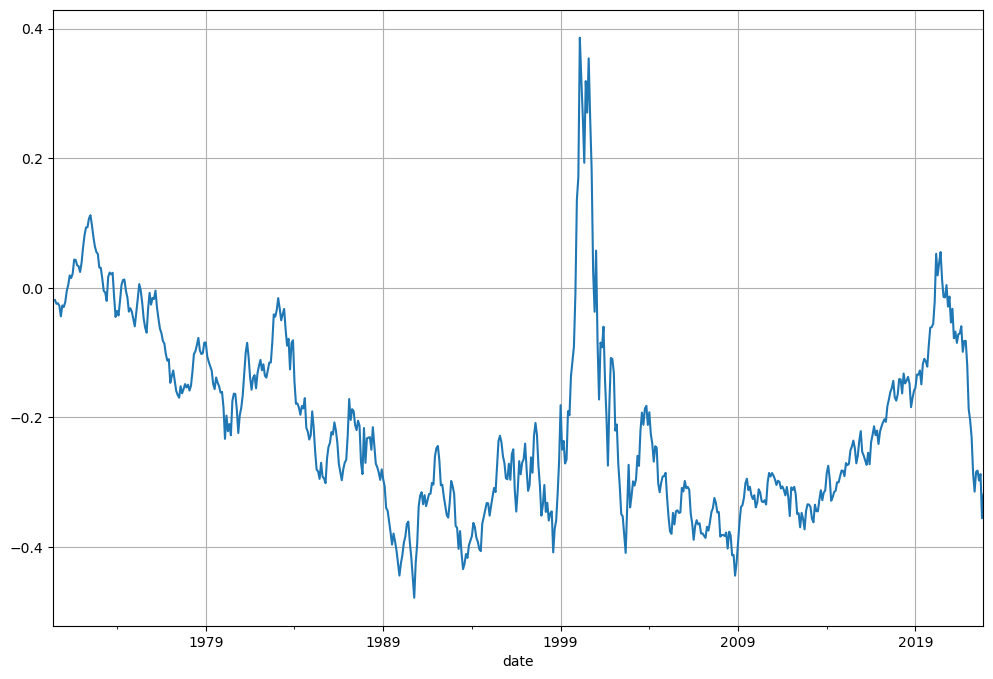

In [33]:
cr_factor = portfolio_returns_cr.loc[:,[(1,3), (2,3)]].mean(axis=1) - portfolio_returns_cr.loc[:,[(1,1), (2,1)]].mean(axis=1)
cr_factor.name = 'cr'
analyze_returns(cr_factor, 'Current Ratio factor', end_date='2022-12')

In [34]:
merged_data = pd.concat([roa_factor, roce_factor, cfm_factor, gp_factor, cr_factor], axis=1).dropna()
merged_data.corr().round(3)

,roa,roce,cfm,gp,cr
roa,1.000,0.946,0.639,0.538,-0.376
roce,0.946,1.000,0.529,0.601,-0.313
cfm,0.639,0.529,1.000,-0.038,-0.441
gp,0.538,0.601,-0.038,1.000,0.255
cr,-0.376,-0.313,-0.441,0.255,1.000


Analysis of a strategy: "All factors"
Start: 1962-05, End: 2002-12
Sharpe ratio: 0.47


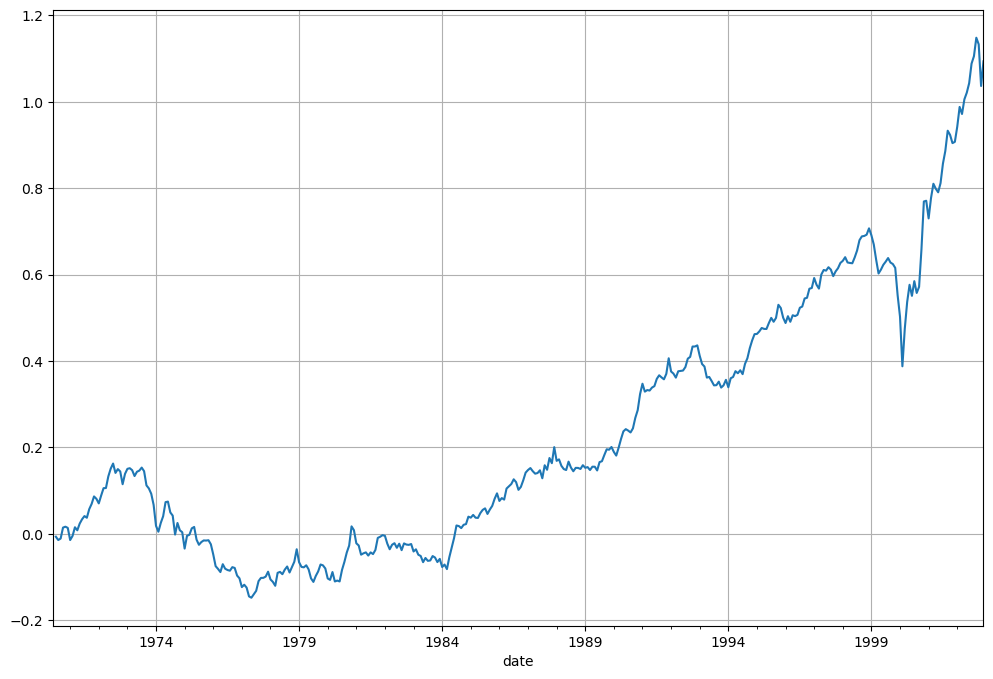

In [46]:
wt_port= 0.25 * roa_factor + 0.25 * roce_factor + 0.25 * cfm_factor + 0.25 * gp_factor
analyze_returns(wt_port, 'All factors', end_date='2002-12')